In [1]:
!pip install pandas


In [2]:
from neuralprophet import NeuralProphet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [16]:
stock_symbol='005935.KS'#samsung
start_date='2021-01-01'
end_date='2023-01-01'

stock_data=yf.download(stock_symbol,start=start_date,end=end_date)

print(stock_data.head())

stock_data.to_csv('stock_data.csv')
stocks.dtypes


[*********************100%%**********************]  1 of 1 completed

               Open     High      Low    Close     Adj Close   Volume
Date                                                                 
2021-01-04  73700.0  75300.0  73600.0  74400.0  69232.976562  5455139
2021-01-05  73600.0  75000.0  73600.0  75000.0  69791.304688  3870698
2021-01-06  75000.0  75600.0  74200.0  74300.0  69139.929688  4103763
2021-01-07  74400.0  74800.0  74300.0  74300.0  69139.929688  3858695
2021-01-08  74700.0  80000.0  74300.0  77800.0  72396.851562  8225064


Date     datetime64[ns]
Close           float64
dtype: object

In [58]:
stocks=pd.read_csv('stock_data.csv')
stocks['Date'] = pd.to_datetime(stocks['Date']) 
stocks = stocks[['Date', 'Close']]
# stocks['Date'] = stocks['Date'].apply(lambda x: x.timestamp())

# Display the DataFrame
print(stocks)



          Date    Close
0   2021-01-04  74400.0
1   2021-01-05  75000.0
2   2021-01-06  74300.0
3   2021-01-07  74300.0
4   2021-01-08  77800.0
..         ...      ...
487 2022-12-23  52500.0
488 2022-12-26  52200.0
489 2022-12-27  52500.0
490 2022-12-28  51300.0
491 2022-12-29  50500.0

[492 rows x 2 columns]


In [42]:
stocks.dtypes

Date         float64
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [61]:
print(stocks['Date'])

0     2021-01-04
1     2021-01-05
2     2021-01-06
3     2021-01-07
4     2021-01-08
         ...    
487   2022-12-23
488   2022-12-26
489   2022-12-27
490   2022-12-28
491   2022-12-29
Name: Date, Length: 492, dtype: datetime64[ns]


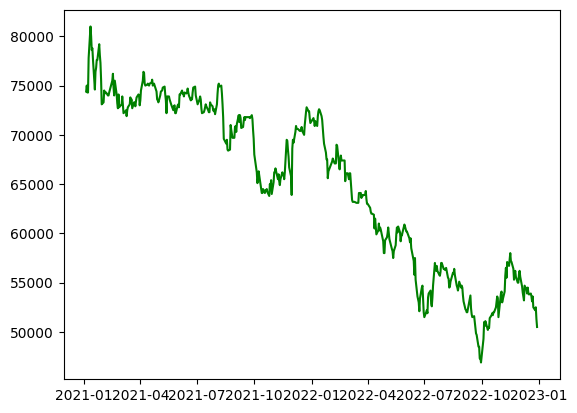

In [62]:
stock1=stocks[['Date', 'Close']]
stock1.columns=['ds', 'y']
plt.plot(stock1['ds'], stock1['y'], label = 'actual', c = 'g' )
plt.show()

In [63]:
print(stock1)

            ds        y
0   2021-01-04  74400.0
1   2021-01-05  75000.0
2   2021-01-06  74300.0
3   2021-01-07  74300.0
4   2021-01-08  77800.0
..         ...      ...
487 2022-12-23  52500.0
488 2022-12-26  52200.0
489 2022-12-27  52500.0
490 2022-12-28  51300.0
491 2022-12-29  50500.0

[492 rows x 2 columns]


In [3]:
model = NeuralProphet()
model.fit(stock1)

NameError: name 'stock1' is not defined

WARNING - (py.warnings._showwarnmsg) - C:\Users\sheet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.732% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\sheet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\sheet\AppData\Local\Pa

Predicting: 16it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\sheet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.732% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\sheet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtyp

            ds     y         yhat1         trend  season_weekly
0   2022-12-30  None  52994.894531  48205.210938    4789.686035
1   2023-01-02  None  53096.597656  48171.027344    4925.571289
2   2023-01-03  None  52813.574219  48159.628906    4653.943848
3   2023-01-04  None  52531.871094  48148.234375    4383.634766
4   2023-01-05  None  52690.093750  48136.839844    4553.251953
..         ...   ...           ...           ...            ...
595 2025-04-11  None  43505.531250  38713.460938    4792.067383
596 2025-04-14  None  43594.812500  38679.273438    4915.540039
597 2025-04-15  None  43318.171875  38667.882812    4650.286133
598 2025-04-16  None  43064.347656  38656.488281    4407.859375
599 2025-04-17  None  43195.511719  38645.093750    4550.418457

[600 rows x 5 columns]


Predicting: 16it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


            ds        y         yhat1         trend  season_weekly
0   2021-01-04  74400.0  77240.250000  72319.046875    4921.202637
1   2021-01-05  75000.0  76925.031250  72258.578125    4666.446777
2   2021-01-06  74300.0  76586.531250  72198.117188    4388.408691
3   2021-01-07  74300.0  76670.945312  72137.656250    4533.286621
4   2021-01-08  77800.0  76868.187500  72077.195312    4790.993164
..         ...      ...           ...           ...            ...
487 2022-12-23  52500.0  53087.636719  48284.972656    4802.663574
488 2022-12-26  52200.0  53167.445312  48250.789062    4916.655762
489 2022-12-27  52500.0  52908.421875  48239.390625    4669.029785
490 2022-12-28  51300.0  52629.621094  48227.996094    4401.623047
491 2022-12-29  50500.0  52751.890625  48216.601562    4535.287109

[492 rows x 5 columns]


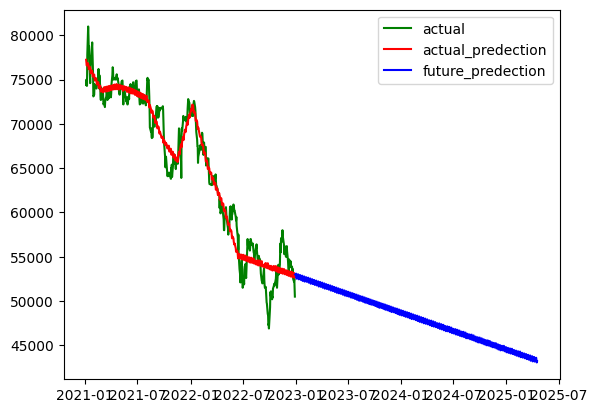

In [74]:
future = model.make_future_dataframe(stock1, periods = 600)
forecast = model.predict(future)
print(forecast)
actual_predection = model.predict(stock1)
print(actual_predection)
plt.plot(stock1['ds'], stock1['y'], label = 'actual', c = 'g' )

plt.plot(actual_predection['ds'], actual_predection['yhat1'], label = 'actual_predection', c= 'r')
plt.plot(forecast['ds'], forecast['yhat1'], label = 'future_predection', c= 'b')
plt.legend()
plt.show()